In [1]:
"""Decided to download the database instead of requesting"""
#request_url = 'https://oda.ft.dk/api/Sag?$expand=SagDokument/Dokument,SagDokument/SagDokumentRolle,Sagskategori,SagAkt%C3%B8r/Akt%C3%B8r,SagAkt%C3%B8r/SagAkt%C3%B8rRolle,EmneordSag/Emneord,Sagskategori&&$inlinecount=allpages'



In [3]:
import pandas as pd
import numpy as np
import networkx as nx


In [7]:
#load pickled data

Sag = pd.read_pickle('../data/raw/Sag.pkl')
Subset = Sag[0:10]

In [10]:
Subset.head()

,id,typeid,kategoriid,statusid,titel,titelkort,offentlighedskode,nummer,nummerprefix,nummernumerisk,...,paragrafnummer,paragraf,afgørelsesdato,afgørelse,rådsmødedato,lovnummer,lovnummerdato,retsinformationsurl,fremsatundersagid,deltundersagid
0,1,4,2,8,FIU alm. del,FIU alm. del,O,None,,,...,<NA>,,NaT,,NaT,,NaT,None,<NA>,<NA>
1,2,10,11,20,"Er ministeren enig i vurderingen af, at grønla...",Om NSA-aflytninger eller aflytninger fra andre...,O,S 725,S,725,...,<NA>,None,NaT,None,NaT,None,NaT,None,<NA>,<NA>
2,3,10,11,20,"Hvad agter ministeren at foretage sig, så kost...","Om at bortvise elever, der har indtaget ulovli...",O,S 726,S,726,...,<NA>,None,NaT,None,NaT,None,NaT,None,<NA>,<NA>
3,4,7,<NA>,54,Forslag til Europa-Parlamentets og Rådets afgø...,Forslag til Europa-Parlamentets og Rådets afgø...,O,KOM (2013) 0860,KOM,860,...,<NA>,None,NaT,None,NaT,None,NaT,None,<NA>,<NA>
4,5,7,<NA>,54,Forslag til Rådets afgørelse om bemyndigelse a...,Forslag til Rådets afgørelse om bemyndigelse a...,O,KOM (2013) 0839,KOM,839,...,<NA>,None,NaT,None,NaT,None,NaT,None,<NA>,<NA>


In [9]:
SagDokument = pd.read_pickle('../data/raw/SagDokument.pkl')
SagDokument.head()

,id,sagid,dokumentid,bilagsnummer,frigivelsesdato,opdateringsdato,rolleid
0,21,4496,7913,,2013-10-16 14:54:51,2014-09-16 06:16:53.990,4
1,30,4886,8595,,2013-11-20 13:40:45,2014-09-14 06:18:43.640,4
2,55,4262,7515,,2013-10-01 15:51:19,2014-09-14 03:18:42.270,4
3,84,5063,8896,,2013-12-02 11:05:42,2014-09-14 07:18:11.007,4
4,87,4680,8245,,2013-11-01 10:29:01,2014-09-14 05:19:24.097,4


In [11]:
SagDokumentRolle = pd.read_pickle('../data/raw/SagDokumentRolle.pkl')
SagDokumentRolle.head()

,id,rolle,opdateringsdato
0,1,Tidl. jour. på,2014-09-19 14:51:24.773
1,2,Parallelomdelt på,2014-10-06 13:54:15.487
2,3,På sagstrin,2015-05-12 14:33:34.010
3,4,Hovedtilknytning,2015-07-15 09:44:04.857
4,5,Se også,2014-09-19 14:24:18.410


In [12]:
Dokument = pd.read_pickle('../data/raw/Dokument.pkl')
Dokument.head()

,id,typeid,kategoriid,statusid,offentlighedskode,titel,dato,modtagelsesdato,frigivelsesdato,paragraf,paragrafnummer,spørgsmålsordlyd,spørgsmålstitel,spørgsmålsid,procedurenummer,grundnotatstatus,dagsordenudgavenummer,opdateringsdato
0,1,13,36,1,O,Spm. om formuefordelingen fordelt på både indk...,2014-08-08,None,2014-08-08 14:57:26,,,None,None,<NA>,,,None,2016-03-14 09:32:33.387
1,2,16,14,1,O,"Er ministeren enig i vurderingen af, at grønla...",2014-01-02,None,2014-01-02 11:36:24,,,None,None,<NA>,,,None,2015-05-29 11:11:34.047
2,3,17,22,1,O,Svar på spm. nr. S 725: Er ministeren enig i v...,2014-01-09,2014-01-09 00:00:00,2014-01-10 09:26:05,,,,"Er ministeren enig i vurderingen af, at grønla...",2,,,None,2014-09-30 16:15:46.607
3,4,16,14,1,O,"Hvad agter ministeren at foretage sig, så kost...",2014-01-02,None,2014-01-20 10:12:24,,,None,None,<NA>,,,None,2015-05-29 11:11:32.563
4,5,17,22,1,O,Svar på spm. nr. S 726: Hvad agter ministeren ...,2014-01-08,2014-01-08 00:00:00,2014-01-08 11:02:45,,,,"Hvad agter ministeren at foretage sig, så kost...",4,,,None,2015-05-29 08:42:54.090


In [ ]:
#I find the dokumentid connected to each of the sagsid's in the subset

In [19]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Create a graph for the entire knowledge graph
knowledge_graph = nx.Graph()
# Add nodes and node attributes for Sag data
for _, row in Subset.iterrows():
    sag_node = row['id'] 
    knowledge_graph.add_node(sag_node, node_type='Sag', **row)  # add node with all attributes, plus a 'node_type' attribute

# Checking the SagDokument table to link 'sagid' to 'dokumentid'
for sagid in Subset['id']:
    # Get all the dokumentid's for this sagid
    dokumentid_list = SagDokument[SagDokument['sagid'] == sagid]['dokumentid'].tolist()
    # Add edges between the sagid and all the dokumentid's
    for dokumentid in dokumentid_list:
        dokument_node = Dokument[Dokument['id'] == dokumentid]
        knowledge_graph.add_node(dokumentid, node_type='Dokument', **dokument_node)
        # Add edges between the sagid and all the dokumentid's
        knowledge_graph.add_edge(sagid, dokumentid)



In [28]:
dokumentid_list

[21, 22, 20]

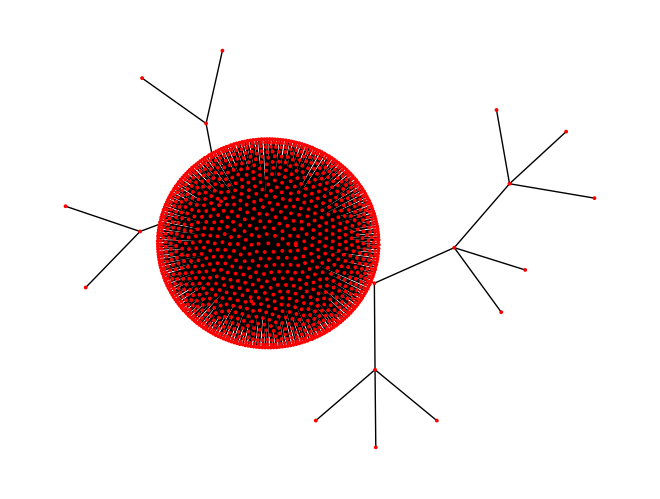

In [27]:
# Create a color map for the different node types
color_map = {'Sag': 'green', 'Dokument': 'red'}
colors = [color_map.get(node_type, 'red') for node_type in nx.get_node_attributes(knowledge_graph, 'node_type').values()]

# Create a size map for the different node types
size_map = {'Sag': 300, 'Dokument': 3}
sizes = [size_map.get(node_type, 100) for node_type in nx.get_node_attributes(knowledge_graph, 'node_type').values()]

# Draw the knowledge graph with different colors and sizes for each node type
pos = nx.kamada_kawai_layout(knowledge_graph)  # use Kamada-Kawai layout algorithm
nx.draw(knowledge_graph, pos, node_color=colors, node_size=sizes, with_labels=False)

# Show the plot
plt.show()